In [1]:
#importing library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.base import BaseEstimator, TransformerMixin



In [33]:
class InfoData:
    def __init__(self, data):
        """Validate the input and read the data from a file"""
        try:
            self.data = pd.read_csv(data)
        except:
            raise ValueError("The data parameter should be a valid file path as a string.")

    def display_all_data(self):  
        """Display all data"""
        return self.data  
    
    def display_head(self):  
        """Display the first 5 rows of data"""
        return self.data.head(5)
    
    def display_tail(self):  
        """Display the last 5 rows of data"""
        return self.data.tail(5)
    
    def shape_data(self):  
        """Display the shape of the data (number of rows and features)"""
        shape = self.data.shape
        print(f"\nThe number of rows in the data: {shape[0]}".title())
        print(f"The number of features in the data: {shape[1]}".title())
        
    def info(self):  
        """Display information about the dataset"""
        self.data.info()  
    
    def describe_numeric(self):  
        """Describe numeric data (e.g., mean, standard deviation, etc.)"""
        return self.data.describe()
    
    def describe_category(self):  
        """Describe categorical data (e.g., columns containing text)"""
        return self.data.describe(include=['O'])
    
    def number_unique(self):  
        """Display the number of unique values in each column"""
        return dict(self.data.nunique())

In [34]:
class ExploratoryDataAnalysis(InfoData):
    def __init__(self, data):
        """Validate the input and clean the data"""
        try:
            super().__init__(data)
            self.cleaned_data = self.display_all_data()  
        except:
            raise ValueError("The data parameter should be a valid file path as a string.")
        
    def number_missing_values(self):  
        """Display the number of missing values in each column"""
        missing_values = self.cleaned_data.isna().sum()
        print(f"\nThe number of missing values in the dataset: {missing_values.sum()}\n")
        print(missing_values)
        
    def visualization_missing_values(self):
        """Display a bar chart for missing values in each column"""
        missing_values = self.cleaned_data.isna().sum()
        fig = px.bar(
            x=missing_values.index, 
            y=missing_values.values, 
            color=list(missing_values.index),
            labels={'x': 'Columns', 'y': 'Missing Values'}, 
            title='Missing Values in Each Column',
            text=[round(i / len(self.cleaned_data) * 100, 2) for i in missing_values.values]  # Adding percentage text
        )
        
        fig.update_traces(
            textposition="outside",  
            textfont={"size": 35, "family": "Consolas"},  
            cliponaxis=False
        )
        
        fig.update_layout(
            template='plotly_dark',  
            xaxis=dict(
                tickmode='linear',
                dtick=1
            ),
            margin=dict(l=50, r=50, t=50, b=100), 
            title=dict(
                x=0.5,  
                font=dict(size=20)
            )
        )
        
        return fig.show()
    
    def display_columns(self):
        """Display the column names in the data"""
        return self.display_all_data().columns
    
    def duplicated_dat(self):
        """Check for duplicates in the data"""
        number_duplicated = self.cleaned_data.duplicated().sum()
        if number_duplicated > 0:
            print(f"\nThe number of duplicated rows in the data: {number_duplicated}".title())
        else:
            print("\nNo duplicated data found.".title())
        return number_duplicated
    
    def remove_duplicates(self):  
        """Remove duplicated rows if found"""
        number_duplicated = self.cleaned_data.duplicated().sum()
        if number_duplicated > 0:
            print("\nRemoving duplicates from the data...".title())
            self.cleaned_data = self.cleaned_data.drop_duplicates()
        else:
            print("\nNo duplicates to remove.".title())
        return self.cleaned_data
    def drop_missing_values(self):
        """
        Removes rows with missing values from the dataset.

        Returns:
        pd.DataFrame: The dataset with rows containing missing values removed.
        """
        self.cleaned_data = self.cleaned_data.dropna()  # Drops rows with missing values
        return self.cleaned_data

            
    def convert_string_to_numeric(self):
        if self.cleaned_data['Invoice'].dtype ==int:
            return "sorry the features of integer "
        else:
            self.cleaned_data[['MSRP','Invoice']]=self.cleaned_data[['MSRP','Invoice']].astype(str)
            for col in ['MSRP','Invoice']:   
                self.cleaned_data[col]=self.cleaned_data[col].apply(lambda x: x.replace('$','') if type(x)==str else x)
                self.cleaned_data[col]=self.cleaned_data[col].astype(str).apply(lambda x: x.replace(',','.') if type(x)==str else x)
                self.cleaned_data[col]=self.cleaned_data[col].astype(float)
            return self.cleaned_data
            
            
    def display_cleaned_data(self):  
        """Display the cleaned data"""
        return self.cleaned_data



In [35]:
# Usage:
path = r'/home/hadoop/Downloads/car_price_predicaiton/2. Cars Data1.csv'

# Read the data:
info_data = InfoData(path)

# Display all data:
print("\n--- All Data ---")
print(info_data.display_all_data())

# Display the first 5 rows:
print("\n--- First 5 Rows ---")
print(info_data.display_head())

# Display the last 5 rows:
print("\n--- Last 5 Rows ---")
print(info_data.display_tail())

# Display the shape of the data:
info_data.shape_data()

# Display dataset information:
print("\n--- Data Information ---")
info_data.info()

# Display numeric data description:
print("\n--- Numeric Data Description ---")
print(info_data.describe_numeric())

# Display categorical data description:
print("\n--- Categorical Data Description ---")
print(info_data.describe_category())

# Display number of unique values:
print("\n--- Number of Unique Values ---")
print(info_data.number_unique())


# Exploratory Data Analysis (EDA):
eda_data = ExploratoryDataAnalysis(path)

# Display number of missing values:
eda_data.number_missing_values()

# Display a bar chart for missing values:
eda_data.visualization_missing_values()

# Display column names in the data:
print("\n--- Column Names ---")
print(eda_data.display_columns())

# Check for duplicates in the data:
eda_data.duplicated_dat()

# Remove duplicates if found:
new_data=eda_data.remove_duplicates()
new_data=eda_data.drop_missing_values()

#convert the features Invoice 
new_data=eda_data.convert_string_to_numeric()
# new_data = eda_data.cleaned_data# Save the cleaned data in a new variable:
# Display the cleaned data:
print("\n--- Cleaned Data ---")
print(eda_data.display_cleaned_data())




--- All Data ---
      Make                    Model   Type  Origin DriveTrain      MSRP  \
0    Acura                      MDX    SUV    Asia        All  $36,945    
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  $23,820    
2    Acura                  TSX 4dr  Sedan    Asia      Front  $26,990    
3    Acura                   TL 4dr  Sedan    Asia      Front  $33,195    
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  $43,755    
..     ...                      ...    ...     ...        ...       ...   
427  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565    
428  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565    
429  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210    
430  Volvo                      V40  Wagon  Europe      Front  $26,135    
431  Volvo                     XC70  Wagon  Europe        All  $35,145    

      Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    $


--- Column Names ---
Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

The Number Of Duplicated Rows In The Data: 3

Removing Duplicates From The Data...

--- Cleaned Data ---
      Make                    Model   Type  Origin DriveTrain    MSRP  \
0    Acura                      MDX    SUV    Asia        All  36.945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23.820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26.990   
3    Acura                   TL 4dr  Sedan    Asia      Front  33.195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43.755   
..     ...                      ...    ...     ...        ...     ...   
427  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40.565   
428  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42.565   
42

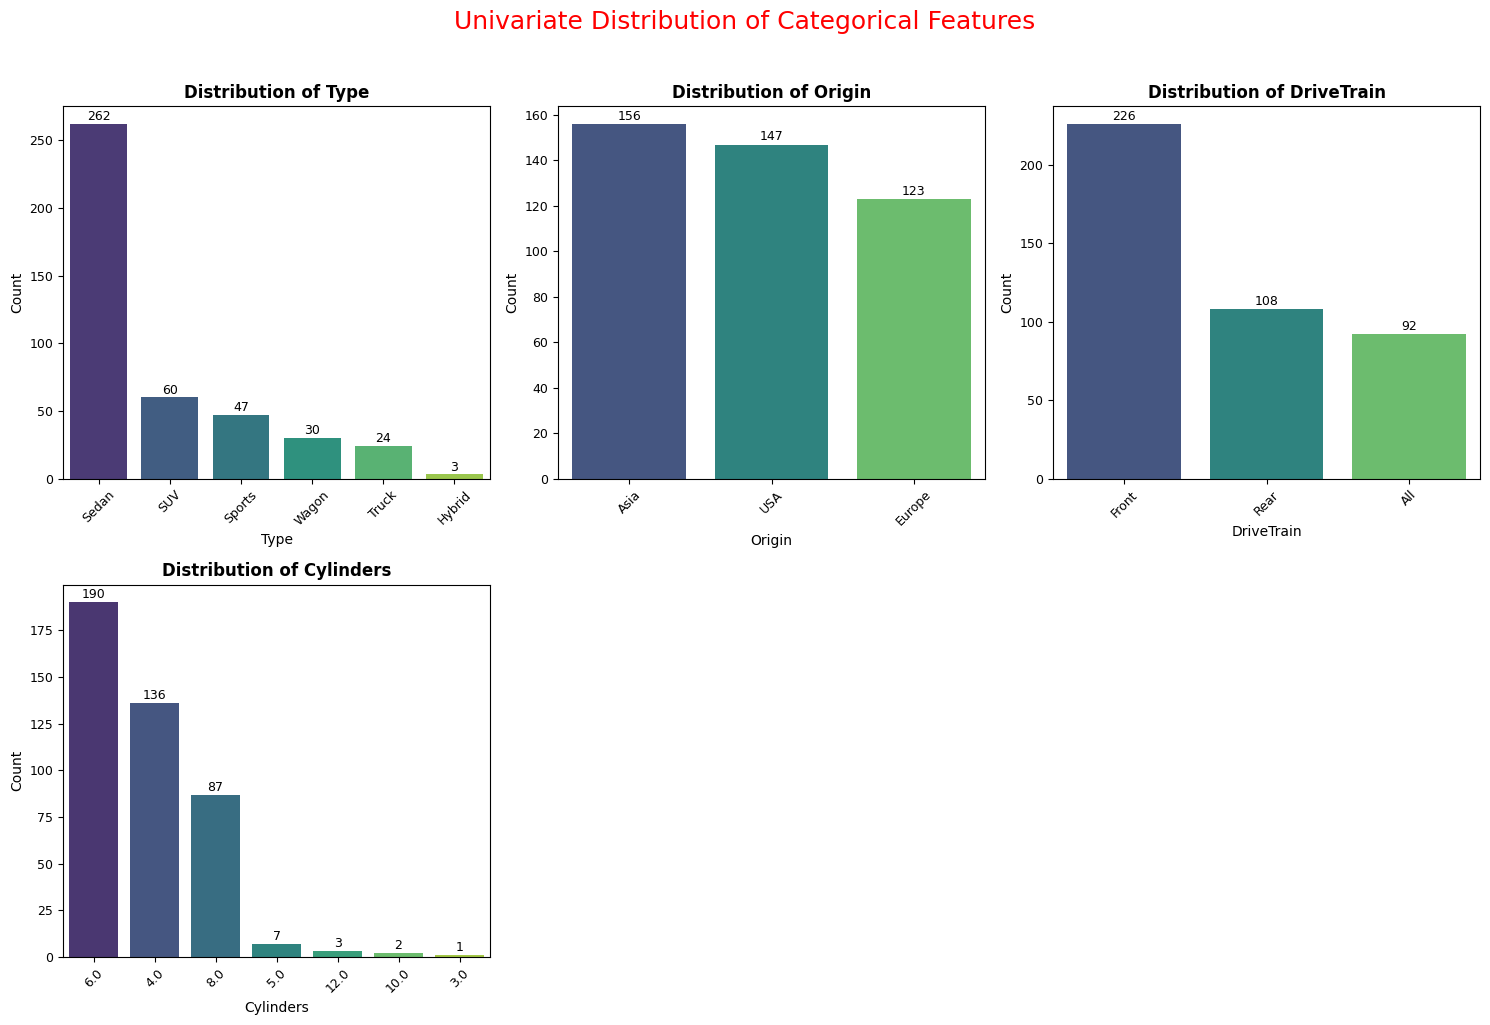

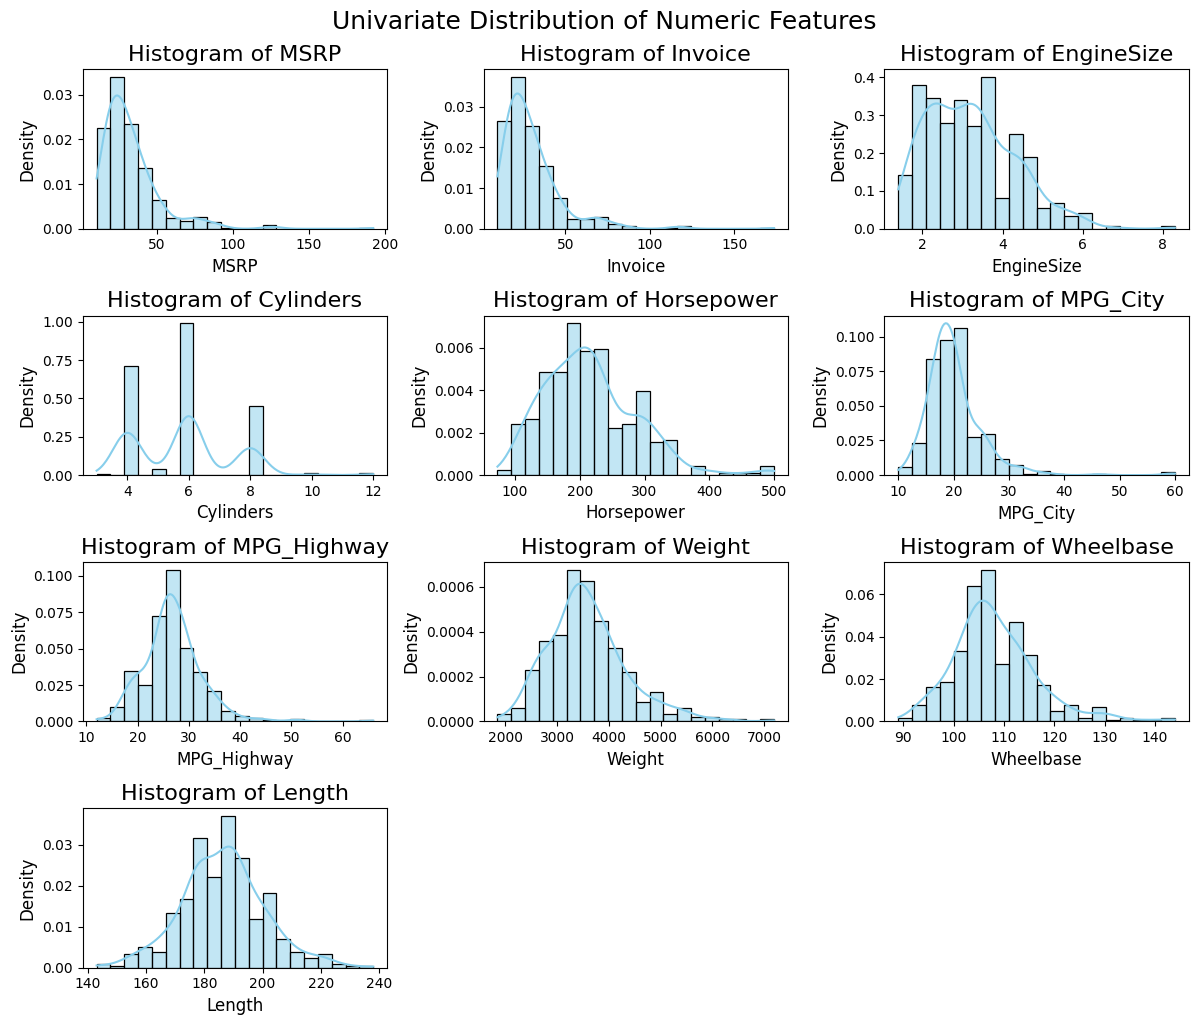

In [36]:
class visualization_Univariate:
    """
    A class for visualizing univariate distributions in a dataset using histograms, 
    count plots, and box plots (with Plotly).
    """

    def __init__(self, data):
        """
        Initializes the visualization_Univariate class with the provided dataset.

        Parameters:
        data (pd.DataFrame): The input dataset as a pandas DataFrame.

        Raises:
        ValueError: If the provided data is not a pandas DataFrame.
        """
        try:
            self.data = data
        except:
            raise ValueError("The data parameter should be a valid pandas DataFrame.")
    
    def vis_hist(self):
        """
        Visualizes the distribution of numeric features using histograms.

        Returns:
        None: Displays histograms for numeric features.
        """
        # Select numeric columns from the dataset
        col_numeric = self.data.select_dtypes(np.number).columns
        num_col = 3  # Number of columns in the plot grid
        num_row = (len(col_numeric) + num_col - 1) // num_col  # Calculate the number of rows

        plt.figure(figsize=(12, 10))  # Set the figure size

        # Create histograms for each numeric column
        for i, col in enumerate(col_numeric):
            plt.subplot(num_row, num_col, i + 1)
            sns.histplot(data=self.data, x=col, kde=True, bins=20, color='skyblue', stat="density")
            plt.title(f"Histogram of {col}", fontsize=16)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Density', fontsize=12)
        
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.suptitle("Univariate Distribution of Numeric Features", fontsize=18, y=1.02)
        plt.show()
        
    def vis_counts(self):
        """
        Visualizes the distribution of categorical features using count plots.

        Returns:
        None: Displays count plots for categorical features.
        """
        # Select categorical columns with a limited number of unique values
        columns_cat = [col for col in self.data.columns if self.data[col].nunique() <= 8]

        plt.figure(figsize=(15, 10))  # Set the figure size
        num_col = 3  # Number of columns in the plot grid
        num_row = (len(columns_cat) + num_col - 1) // num_col  # Calculate the number of rows

        # Create count plots for each categorical column
        for i, col in enumerate(columns_cat):
            plt.subplot(num_row, num_col, i + 1)
            sorted_order = self.data[col].value_counts().index  # Sort categories by count
            
            sns.countplot(data=self.data, x=col, palette="viridis", order=sorted_order)
            plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            plt.xlabel(f'{col}', fontsize=10)
            plt.ylabel('Count', fontsize=10)
            plt.xticks(rotation=45, fontsize=9)
            plt.yticks(fontsize=9)
            
            # Add value annotations on top of bars
            value_counts = self.data[col].value_counts()
            for i, v in enumerate(value_counts.values):
                plt.text(i, v + 0.5, f"{v:.0f}", ha='center', va='bottom', fontsize=9, color='black')
        
        plt.suptitle("Univariate Distribution of Categorical Features", fontsize=18, y=1.02, color='red')
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
        
    def vis_box_plotly(self):
        """
        Visualizes numeric features using box plots with Plotly.

        Returns:
        None: Displays interactive box plots for numeric features.
        """
        # Select numeric columns from the dataset
        col_numeric = self.data.select_dtypes(include='number').columns  
        num_col = 3  # Number of columns in the plot grid
        num_row = (len(col_numeric) + num_col - 1) // num_col  # Calculate the number of rows

        # Create subplots for box plots
        fig = make_subplots(rows=num_row, cols=num_col, subplot_titles=[f"Box Plot of {col}" for col in col_numeric])

        # Add box plots for each numeric column
        for i, col in enumerate(col_numeric):
            row = (i // num_col) + 1  # Calculate subplot row
            col_num = (i % num_col) + 1  # Calculate subplot column
            fig.add_trace(
                go.Box(y=self.data[col], name=col, boxmean=True, marker=dict(color='lightblue')),
                row=row, col=col_num
            )

        # Update layout for the figure
        fig.update_layout(
            height=300 * num_row, width=1000,  # Adjust figure size
            title_text="Box Plots of Numeric Features",
            title_font=dict(size=20, family="Arial", color="black"),
            showlegend=False, template='plotly_dark'
        )

        # Customize annotation and axis fonts
        fig.update_annotations(font_size=12)
        fig.update_xaxes(title_font=dict(size=12), tickfont=dict(size=10))
        fig.update_yaxes(title_font=dict(size=12), tickfont=dict(size=10))

        fig.show()

        


    
a=visualization_Univariate(new_data)
a.vis_counts()
a.vis_hist()
a.vis_box_plotly()


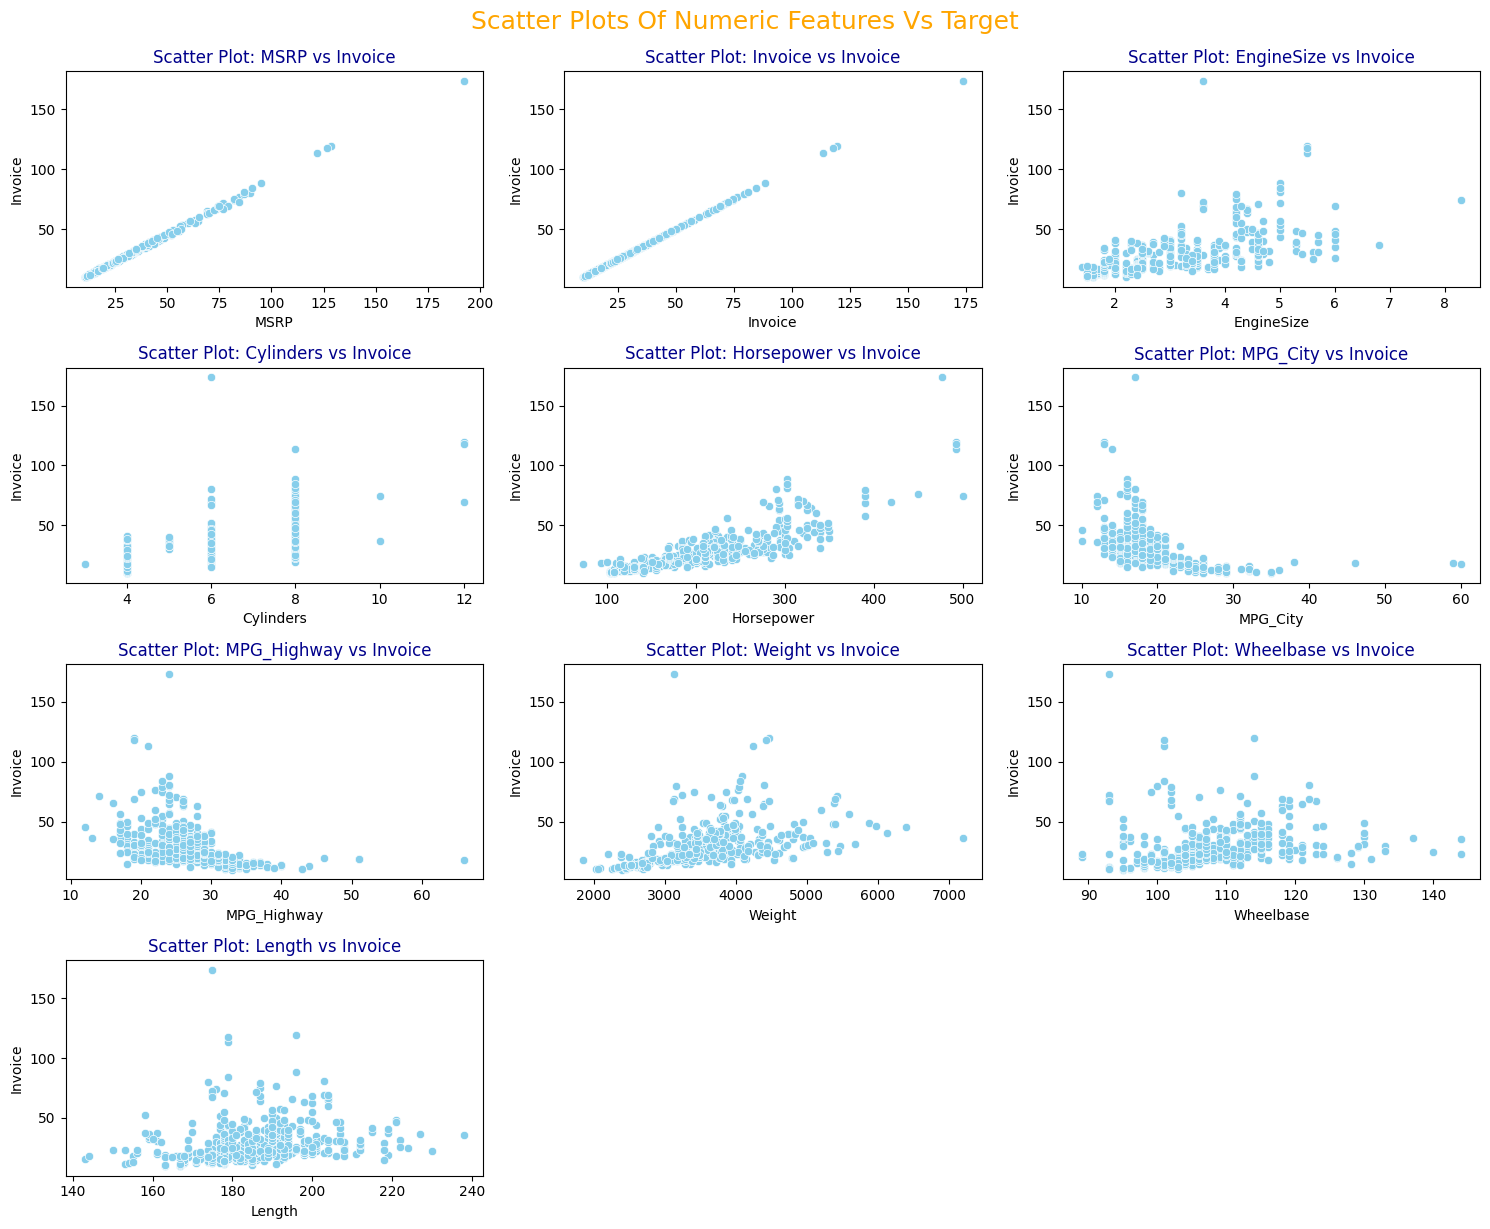

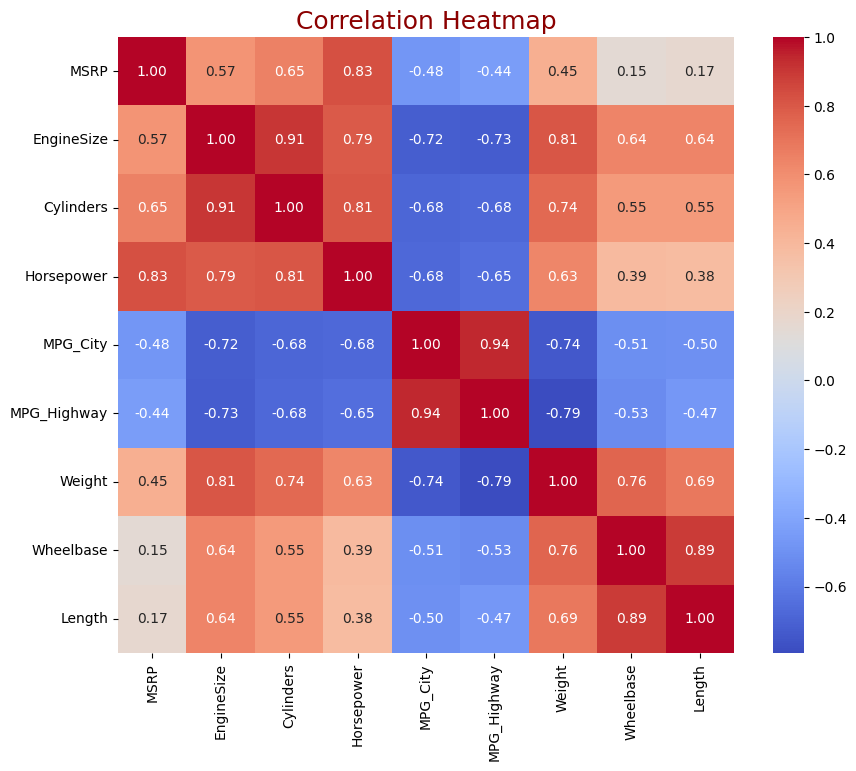

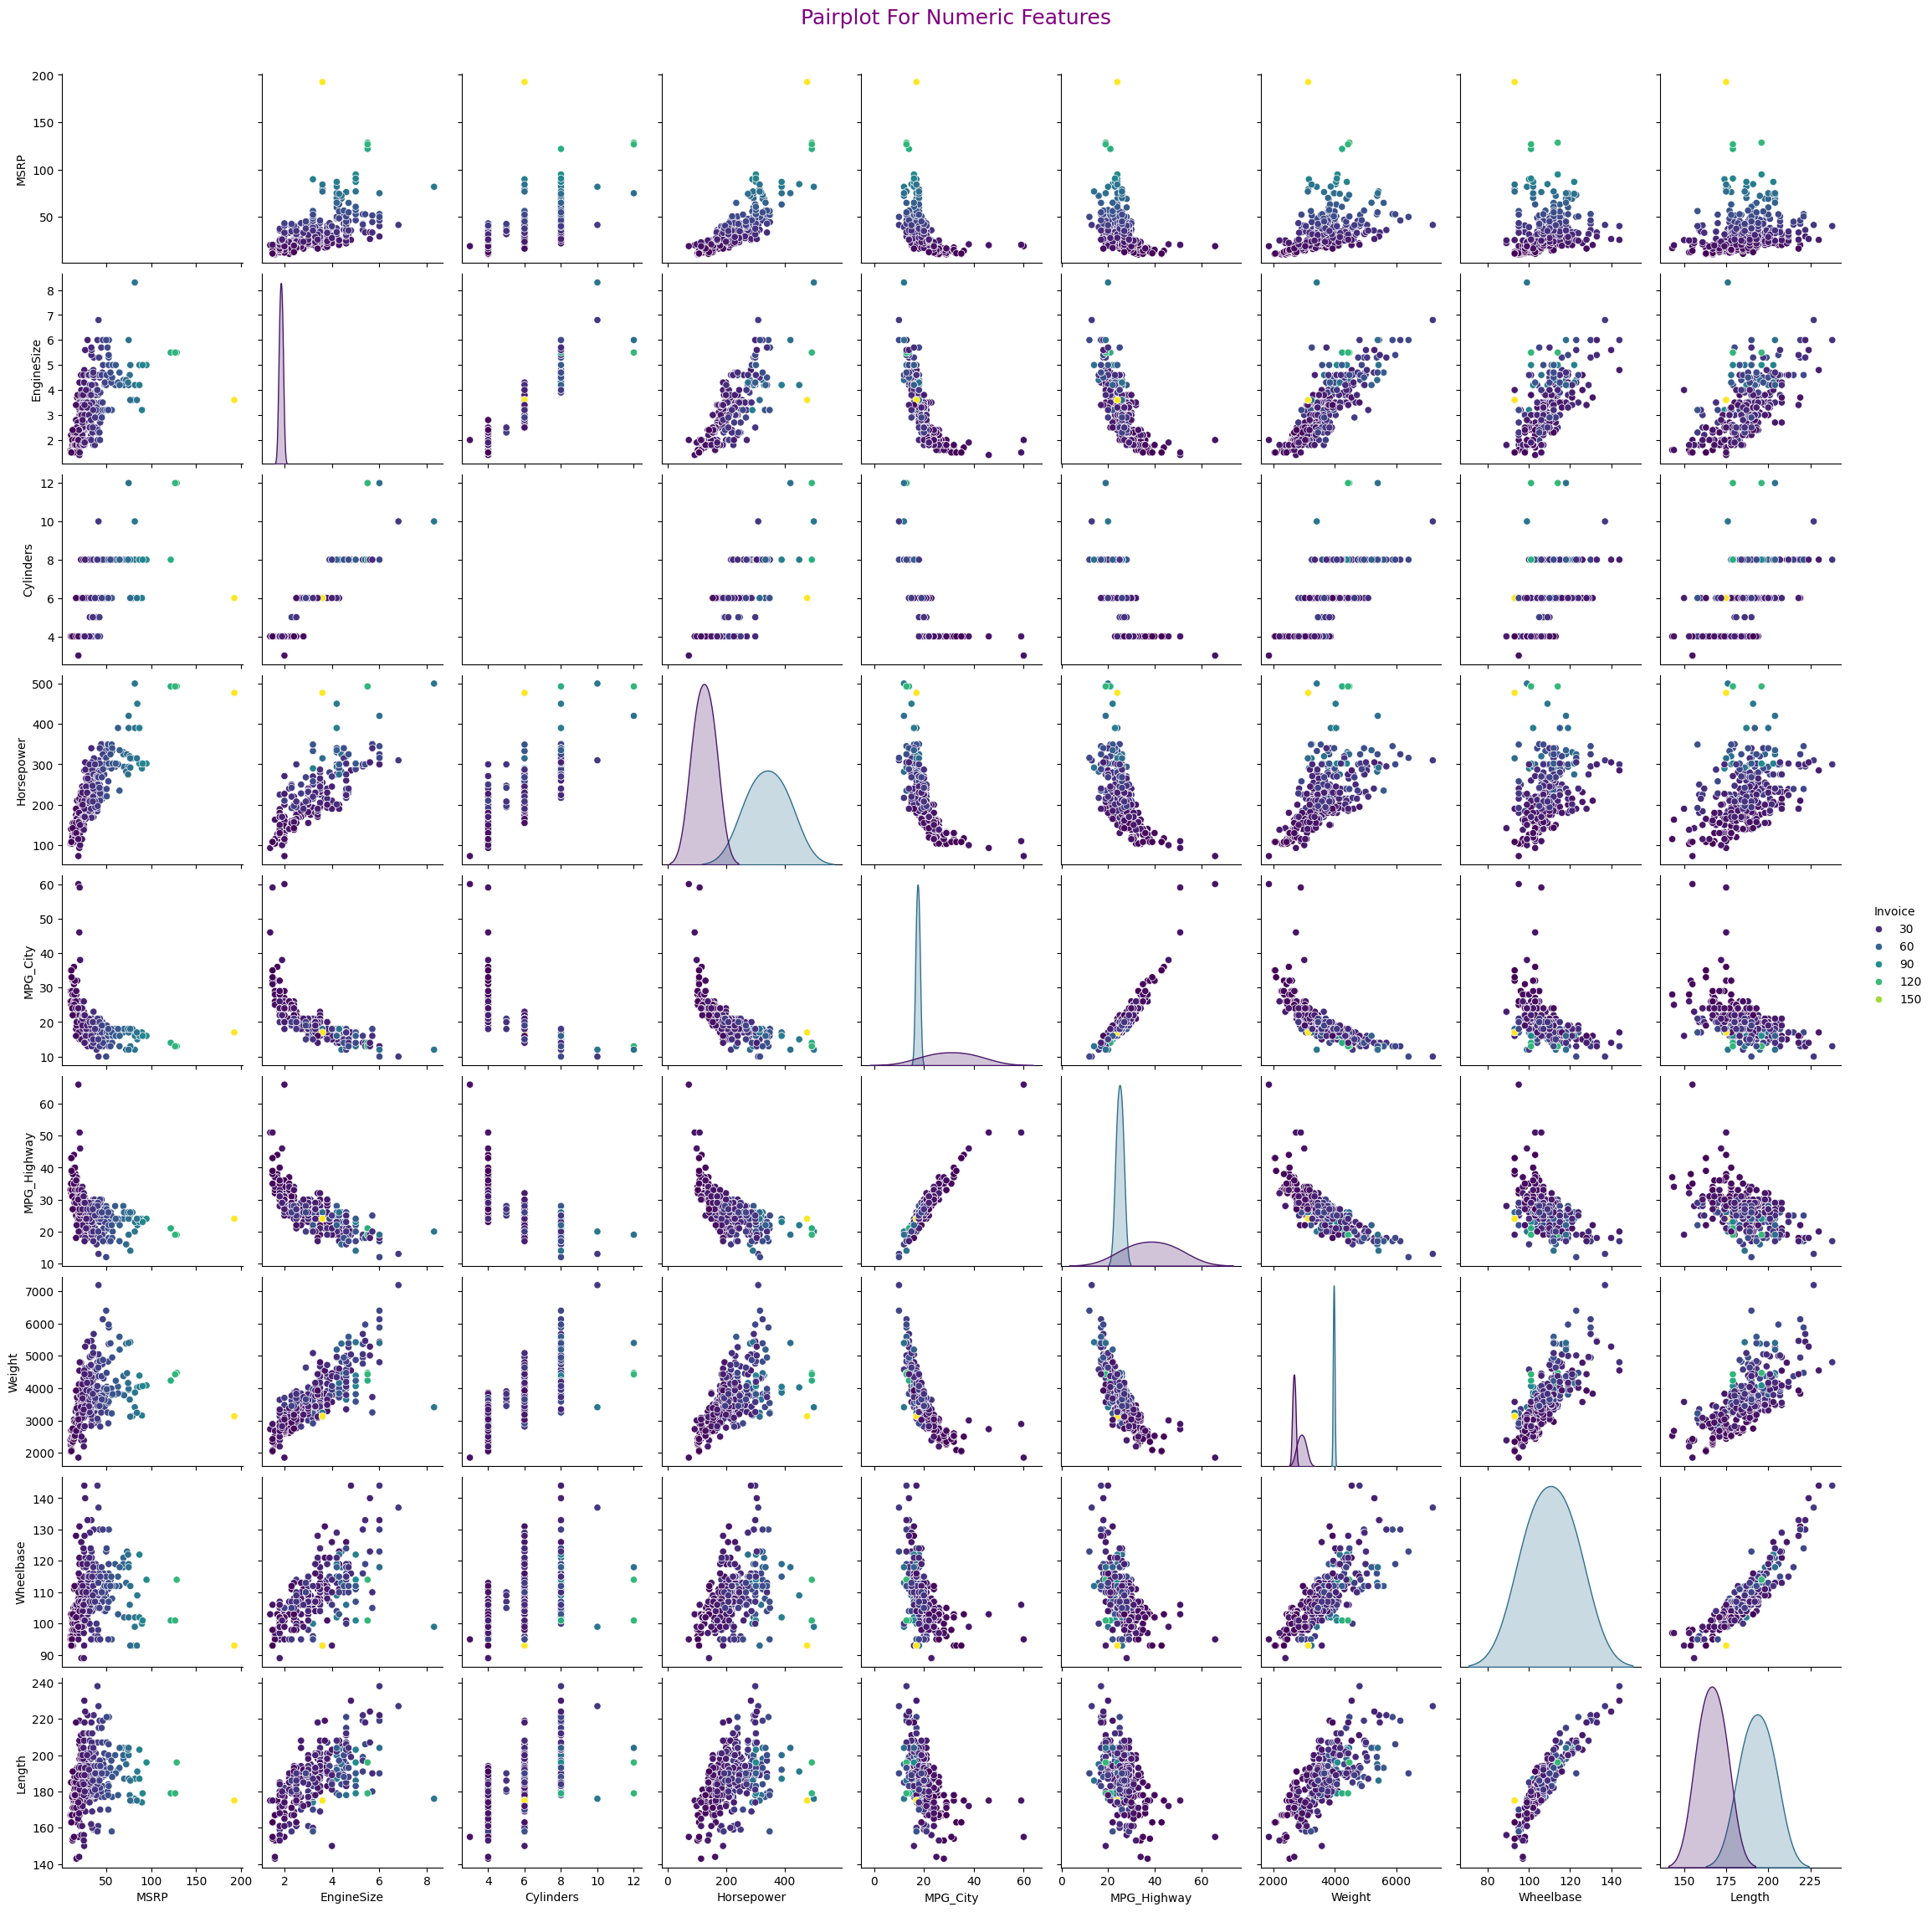

In [37]:
class visualization_bivariate:
    """
    A class for visualizing bivariate relationships in a dataset using scatter plots, 
    correlation heatmaps, and pairplots.
    """

    def __init__(self, data):
        """
        Initializes the visualization_bivariate class with the provided dataset.

        Parameters:
        data (pd.DataFrame): The input dataset as a pandas DataFrame.

        Raises:
        ValueError: If the provided data is not a pandas DataFrame.
        """
        try:
            self.data = data
        except:
            raise ValueError("The data parameter should be a valid pandas DataFrame.")
    
    def vis_scatter(self, target_column):
        """
        Generates scatter plots between numeric columns in the dataset and the target column.

        Parameters:
        target_column (str): The target column to compare with numeric features.

        Raises:
        ValueError: If the target column is not found in the dataset.

        Returns:
        None: Displays scatter plots.
        """
        # Check if the target column exists in the dataset
        if target_column not in self.data.columns:
            raise ValueError(f"Target column '{target_column}' not found in the data.")
        
        # Select numeric columns from the dataset
        col_numeric = self.data.select_dtypes(include='number').columns
        num_col = 3  # Number of columns for subplots
        num_row = (len(col_numeric) + num_col - 1) // num_col  # Calculate the number of rows
        
        plt.figure(figsize=(15, 12))  # Set the figure size

        # Loop through numeric columns and create scatter plots
        for i, col in enumerate(col_numeric):
            plt.subplot(num_row, num_col, i + 1)  # Create subplot
            sns.scatterplot(data=self.data, x=col, y=target_column, color='skyblue')  # Scatter plot
            plt.title(f"Scatter Plot: {col} vs {target_column}", fontsize=12, color="darkblue")  # Title
            plt.xlabel(col, fontsize=10)  # X-axis label
            plt.ylabel(target_column, fontsize=10)  # Y-axis label
        
        plt.tight_layout()  # Adjust subplot spacing
        plt.suptitle("Scatter Plots of Numeric Features vs Target".title(), fontsize=18, y=1.02, color='orange')
        plt.show()

    def vis_correlation(self):
        """
        Generates a correlation heatmap for numeric columns in the dataset.

        Returns:
        None: Displays the correlation heatmap.
        """
        plt.figure(figsize=(10, 8))  # Set the figure size

        # Select numeric columns excluding the target column 'Invoice'
        col_numeric = self.data.select_dtypes(include='number').drop(columns=['Invoice'])
        
        # Compute the correlation matrix
        correlation_matrix = col_numeric.corr()
        
        # Create a heatmap for the correlation matrix
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title("Correlation Heatmap", fontsize=18, color="darkred")  # Title
        plt.show()
    
    def vis_pairplot(self, target_column):
        """
        Generates a pairplot for numeric features, grouped by the target column.

        Parameters:
        target_column (str): The target column for grouping in the pairplot.

        Raises:
        ValueError: If the target column is not found in the dataset.

        Returns:
        None: Displays the pairplot.
        """
        # Check if the target column exists in the dataset
        if target_column not in self.data.columns:
            raise ValueError(f"Target column '{target_column}' not found in the data.")
        
        # Create a pairplot with the target column as hue
        sns.pairplot(self.data, hue=target_column, palette='viridis', diag_kind='kde')
        plt.suptitle("Pairplot for Numeric Features".title(), fontsize=18, y=1.02, color='purple')
        plt.show()
visualization=visualization_bivariate(new_data)
visualization.vis_scatter('Invoice')
visualization.vis_correlation()
visualization.vis_pairplot('Invoice')

In [38]:
label_encoder=LabelEncoder()
encoder=OrdinalEncoder()
class Preprocessing:
    """
    A class for preprocessing a dataset, including handling missing values 
    and applying label encoding to categorical columns.
    """

    def __init__(self, data):
        """
        Initializes the Preprocessing class with the provided dataset.

        Parameters:
        data (pd.DataFrame): The input dataset as a pandas DataFrame.

        Raises:
        ValueError: If the provided data is not a pandas DataFrame.
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("The data parameter should be a valid pandas DataFrame.")
        self.data = data

    def label_encoding(self):
        """
        Applies label encoding to specific categorical columns in the dataset.

        Encoding logic:
        - 'DriveTrain': Maps categorical values to integers:
            'Rear' -> 3, 'All' -> 2, 'Front' -> 1
        - 'Make': Uses LabelEncoder to convert unique string categories into integers.
        - 'Type': Uses LabelEncoder for encoding categorical values into integers.
        - 'Origin': Uses LabelEncoder for encoding categorical values into integers.

        Returns:
        pd.DataFrame: The dataset with categorical columns encoded as integers.
        """
        drive_train_order = ['Front', 'All', 'Rear']  # This is the order you want to apply

        # Use OrdinalEncoder with the specified category order
        encoder = OrdinalEncoder(categories=[drive_train_order])

        # Apply the encoding to the 'DriveTrain' column
        self.data['DriveTrain'] = encoder.fit_transform(self.data[['DriveTrain']])

        
        # Encode 'Make' column using LabelEncoder
        
        '''# encoder_make=self.data.groupby('Make',as_index=False)['Invoice'].median().sort_values(ascending=False,by='Invoice') Way 1 encoder Make
        # encoder_make['label_encoder']=[i for i in range(len(encoder_make['Make']),0,-1)]
        # map_make=dict(zip(encoder_make['Make'],encoder_make['label_encoder']))
        # self.data['Make']=self.data['Make'].map(map_make)'''
        self.data['Make'] = label_encoder.fit_transform(self.data['Make'])
        
        # Encode 'Type' column using LabelEncoder
        self.data['Type'] = label_encoder.fit_transform(self.data['Type'])
        
        # Encode 'Origin' column using LabelEncoder
        self.data['Origin'] = label_encoder.fit_transform(self.data['Origin'])
                
        return self.data  
        

data_preprocessing=Preprocessing(new_data)
new_data=data_preprocessing.label_encoding()

In [39]:
class Model:
    def __init__(self, model):
        """
        Initializes the class with a machine learning model.
        :param model: Machine learning model (e.g., sklearn model).
        """
        self.model = model

    def train_model(self, X_train, y_train):
        """
        Trains the model using the training data.
        :param X_train: Features for training.
        :param y_train: Target variable for training.
        :return: Trained model.
        """
        try:
            self.model.fit(X_train, y_train)
            print("Model training completed.")
        except Exception as e:
            print(f"Error during model training: {e}")
        return self.model

    def predict_model(self, X_test):
        """
        Makes predictions using the trained model.
        :param X_test: Features for testing.
        :return: Predicted values.
        """
        try:
            predictions = self.model.predict(X_test)
            print("Predictions completed.")
        except Exception as e:
            print(f"Error during prediction: {e}")
            predictions = None
        return predictions

    def evaluate_model(self, X_test, y_test, X_train, y_train):
        """
        Evaluates the model using test and train data.
        :param X_test: Features for testing.
        :param y_test: Actual target values for testing.
        :param X_train: Features for training.
        :param y_train: Actual target values for training.
        :return: Evaluation scores (Train score, Test score, R2 score, RMSE).
        """
        try:
            # Train score
            train_score = self.model.score(X_train, y_train)
            print(f"Model evaluation score (Train Data): {train_score:.4f}")
            
            # Test score
            test_score = self.model.score(X_test, y_test)
            print(f"Model evaluation score (Test Data): {test_score:.4f}")
            
            # Predictions
            y_predict = self.model.predict(X_test)
            
            # R2 score
            r2_score_ = r2_score(y_test, y_predict)
            print(f"Model evaluation R2 Score: {r2_score_:.4f}")
            
            # RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_predict))
            print(f"Model evaluation RMSE: {rmse:.4f}")
            
        except Exception as e:
            print(f"Error during model evaluation: {e}")
            train_score, test_score, r2_score_, rmse = None, None, None, None
        
        return train_score, test_score, r2_score_, rmse


In [40]:
X=new_data.drop(columns=['Invoice','Model','MPG_City','MPG_Highway'],axis=1)
y=new_data['Invoice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)


In [41]:
#MODEL TRAIN
model1=Model(GradientBoostingRegressor(random_state=42))
train_model=model1.train_model(X_train,y_train)
y_predict=model1.predict_model(X_test)
score_train,score_test,r2_score_,mse_=model1.evaluate_model(X_test,y_test,X_train,y_train)

Model training completed.
Predictions completed.
Model evaluation score (Train Data): 0.9998
Model evaluation score (Test Data): 0.9971
Model evaluation R2 Score: 0.9971
Model evaluation RMSE: 0.8612


In [42]:
y_predict

array([ 34.8734043 ,  19.85595565,  22.36343108,  35.43834456,
        29.1672652 ,  15.27524806,  12.52335734,  17.68436972,
        23.39047982,  18.42037223,  35.87120388,  13.8824466 ,
        53.42003878,  67.69195328,  64.5141573 ,  29.29906423,
       118.4410232 ,  19.8655675 ,  29.50739197,  27.32169436,
        31.69596015,  32.80344987,  47.14830234,  48.45697232,
        20.62025517,  55.2223966 ,  15.72706071,  19.91178732,
        36.86958115,  49.03828878,  17.79313625,  69.40429411,
        20.05888256,  19.87828488,  37.32893637,  25.37191247,
        37.9617311 ,  17.59282568,  20.03609477,  39.28362319,
        41.09614766,  23.18685544,  21.48269129,  17.50403157,
        33.67145596,  18.43857121,  24.84393502,  22.91813161,
        46.35936896,  24.96750015,  40.56528774,  48.5493437 ,
        12.672422  ,  33.51577183,  44.06558337,  30.93724883,
        28.44708813,  43.17570141,  31.04324364,  40.18051503,
        18.37683187,  14.68294726,  22.30716997,  16.62

In [43]:
# class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column
#         self.label_encoder = LabelEncoder()

#     def fit(self, X, y=None):
#         self.label_encoder.fit(X[self.column])
#         return self  # تأكد من إرجاع self هنا

#     def transform(self, X):
#         X_copy = X.copy()
#         X_copy[self.column] = self.label_encoder.transform(X_copy[self.column])
#         return X_copy


# cat_transform = ColumnTransformer(
#     transformers=[
#         ('label_encoder_make', LabelEncoderTransformer('Make'), ['Make']),
#         ('label_encoder_Origin', LabelEncoderTransformer('Origin'), ['Origin']),
#         ('label_encoder_Type', LabelEncoderTransformer('Type'), ['Type']),
#         ('ordinal_encoder_drive', OrdinalEncoder(categories=[['Front', 'All', 'Rear']]), ['DriveTrain'])
#     ],
#     remainder='passthrough'
# )

# # Create the pipeline
# model_pipeline = Pipeline(steps=[
#     ('transform_encoder', cat_transform),
#     ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42))
# ])

# # Fit the model
# model_pipeline.fit(X_train, y_train)

# # Evaluate the model
# score = model_pipeline.score(X_test, y_test)
# print(f"Model R^2 score: {score}")
# print(f"Model score train: {model_pipeline.score(X_train, y_train)}")
# print(f"Model score test: {model_pipeline.score(X_test, y_test)}")



# features=dict()
# features['Make']='Acura'
# features['Type']='Sedan'
# features['Origin']='Asia'
# features['DriveTrain']='Front'
# features['MSRP']= 23.82
# features['EngineSize']=2.0
# features['Cylinders']= 4.0
# features['Horsepower']=200.0
# features['Weight']=2778.0
# features['Wheelbase']=101.0
# features['Length']=172.0
# input_data_=pd.DataFrame([features])

# prediction = model_pipeline.predict(input_data_)

# print(f"Prediction: {prediction}")


In [48]:
with open('car_price_prediction.pkl','wb') as file:
    pickle.dump(model1.model,file)

### **Code Summary**

1. **Custom Label Encoding:**
   - A `LabelEncoderTransformer` class is implemented to encode categorical features (`Make`, `Origin`, `Type`).

2. **Column Transformer:**
   - Combines:
     - `LabelEncoderTransformer` for categorical columns.
     - `OrdinalEncoder` for `DriveTrain` with ordered categories.
     - Leaves other columns as is (`remainder='passthrough'`).

3. **Pipeline:**
   - Preprocesses data with the `ColumnTransformer`.
   - Trains a `GradientBoostingRegressor` to predict car prices (`MSRP`).

4. **Model Training & Evaluation:**
   - Fits the pipeline on training data (`X_train`, `y_train`).
   - Evaluates with `R^2` score for both train and test sets.

5. **Prediction:**
   - Prepares a new car's features in a dictionary.
   - Converts the dictionary into a DataFrame for prediction.
   - Predicts the MSRP using the trained pipeline.

6. **Output:**
   - Prints model scores and the predicted price for the new car.


In [2]:
import sklearn
print(sklearn.__version__)


1.5.2
